In [1]:
import pandas as pd
df=pd.read_csv("d:/data/customer/customer.csv")
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [2]:
train_cols=df.columns[0:16]
X=df[train_cols]
y=df["Churn"]

In [3]:
# #언더샘플링
# from imblearn.under_sampling import RandomUnderSampler
# X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
# X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
# y_samp=pd.DataFrame(data=y_sample,columns=["Churn"])
# df_samp=pd.concat([X_samp,y_samp],axis=1)

In [4]:
# 오버 샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=["Churn"])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [5]:
df_samp["Churn"].value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

In [6]:
X=df_samp[train_cols]
y=df_samp["Churn"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
  stratify=y,random_state=0)

In [8]:
from sklearn.svm import SVC
model=SVC(random_state=10)
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.7192982456140351


In [10]:
#변수의 단위가 다르므로 스케일링
min_on_training=X_train.min(axis=0)
range_on_training=(X_train - min_on_training).max(axis=0)
X_train_scaled=(X_train - min_on_training) / range_on_training
X_test_scaled=(X_test - min_on_training) / range_on_training

In [11]:
model=SVC(random_state=10)
model.fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.8114035087719298
0.7947368421052632


최적의 C: 1000
최적의 gamma: 0.1
최적의 정확도: 0.9175438596491228


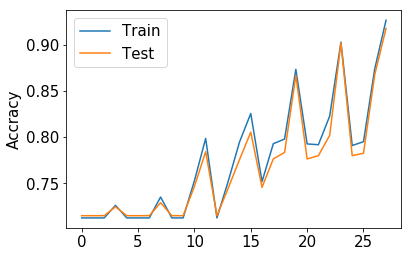

In [16]:
#C,gamma value 최적화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
train_rate=[] #학습용 데이터셋의 정확도를 저장할 리스트
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000] #튜닝할 값들
g_values=[0.0001,0.001,0.01,0.1]
for n in c_values:
    for g in g_values:
        model=SVC(C=n,gamma=g,random_state=10) #svm 모형 생성
        model.fit(X_train_scaled,y_train)
        #산출된 정확도값을 리스트에 추가
        train_rate.append([n,g,model.score(X_train_scaled,y_train)])
        test_rate.append([n,g,model.score(X_test_scaled,y_test)])
        
train_arr=np.array(train_rate) #리스트를 넘파이 배열로 변환
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2]) #가장 높은 정확도
idx=np.where(test_arr == max_rate)[0][0] #인덱스 조회
print("최적의 C:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])

plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)),train_arr[:,2],label="Train")
plt.plot(range(len(test_rate)),test_arr[:,2],label="Test")
plt.ylabel("Accracy")
plt.legend()

In [18]:
model=SVC(C=1000,gamma=0.1,random_state=10)
model.fit(X_train_scaled,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.9263157894736842
0.9175438596491228
